In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import math

In [2]:
# Cargar el archivo JSON en una lista de diccionarios
with open('response_1692148702581.json', 'r') as json_file:
    data = json.load(json_file)

# Convertir la lista de diccionarios en un DataFrame de Pandas
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)


                    id symbol                name  \
0              bitcoin    btc             Bitcoin   
1             ethereum    eth            Ethereum   
2               tether   usdt              Tether   
3          binancecoin    bnb                 BNB   
4               ripple    xrp                 XRP   
..                 ...    ...                 ...   
95          terra-luna   lunc  Terra Luna Classic   
96         huobi-token     ht               Huobi   
97                 sui    sui                 Sui   
98                 gmx    gmx                 GMX   
99  trust-wallet-token    twt        Trust Wallet   

                                                image  current_price  \
0   https://assets.coingecko.com/coins/images/1/la...   1.598009e+01   
1   https://assets.coingecko.com/coins/images/279/...   1.000000e+00   
2   https://assets.coingecko.com/coins/images/325/...   5.467500e-04   
3   https://assets.coingecko.com/coins/images/825/...   1.293362e-01   
4  

El código anterior carga un archivo JSON en una lista de diccionarios utilizando la función  `json.load()` . Luego, convierte la lista de diccionarios en un DataFrame de Pandas utilizando la función  `pd.DataFrame()` . Finalmente, imprime el DataFrame.

Por favor, avísame si tienes alguna pregunta específica o si hay algo más en lo que pueda ayudarte.

In [3]:
# consulta la información de mi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                100 non-null    object 
 1   symbol                            100 non-null    object 
 2   name                              100 non-null    object 
 3   image                             100 non-null    object 
 4   current_price                     100 non-null    float64
 5   market_cap                        100 non-null    int64  
 6   market_cap_rank                   100 non-null    int64  
 7   fully_diluted_valuation           94 non-null     float64
 8   total_volume                      100 non-null    float64
 9   high_24h                          100 non-null    float64
 10  low_24h                           100 non-null    float64
 11  price_change_24h                  100 non-null    float64
 12  price_cha

In [4]:
# borrar la columna de image que no necesito
df = df.drop('image', axis=1)


In [5]:
# consultar la tabla con los datos 
df.head()

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,15.980093,310891143,1,335518729.0,6868925.0,16.012183,15.924245,...,2.100000e+07,2.100000e+07,624.203000,-97.44109,2015-10-20T00:00:00.000Z,6.779735,135.59562,2017-06-12T00:00:00.000Z,None,2023-08-16T01:15:51.994Z
1,ethereum,eth,Ethereum,1.000000,120142223,2,120142223.0,2807874.0,1.000000,1.000000,...,1.201422e+08,NaN,1.003981,-0.39652,2019-10-15T16:26:30.106Z,0.999877,0.01228,2019-10-22T00:00:00.000Z,"{'times': 82.67186587442266, 'currency': 'btc'...",2023-08-16T01:15:59.426Z
2,tether,usdt,Tether,0.000547,45491147,3,45491147.0,9554291.0,0.000550,0.000541,...,8.318200e+10,NaN,2.363394,-99.97688,2015-10-20T00:00:00.000Z,0.000206,165.20240,2021-11-10T16:22:18.228Z,None,2023-08-16T01:15:00.424Z
3,binancecoin,bnb,BNB,0.129336,19895883,4,25862967.0,252821.0,0.130288,0.129144,...,1.538562e+08,2.000000e+08,0.282269,-54.18451,2021-04-12T21:08:06.683Z,0.000129,100088.76586,2017-10-19T00:00:00.000Z,None,2023-08-16T01:15:51.519Z
4,ripple,xrp,XRP,0.000333,17556187,5,33258363.0,652888.0,0.000342,0.000328,...,9.998852e+10,1.000000e+11,0.012717,-97.38498,2015-08-10T00:00:00.000Z,0.000139,139.05956,2017-03-17T00:00:00.000Z,None,2023-08-16T01:15:54.635Z


In [6]:
df = df.sort_values("market_cap", ascending=False)


In [7]:
# Borrado de las filas que no necesito filtrando las criptomonedas que no necesito
df = df.iloc[:10]

In [8]:
df

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,15.980093,310891143,1,335518729.0,6868925.0,16.012183,15.924245,...,2.100000e+07,2.100000e+07,624.203000,-97.44109,2015-10-20T00:00:00.000Z,6.779735,135.59562,2017-06-12T00:00:00.000Z,None,2023-08-16T01:15:51.994Z
1,ethereum,eth,Ethereum,1.000000,120142223,2,120142223.0,2807874.0,1.000000,1.000000,...,1.201422e+08,NaN,1.003981,-0.39652,2019-10-15T16:26:30.106Z,0.999877,0.01228,2019-10-22T00:00:00.000Z,"{'times': 82.67186587442266, 'currency': 'btc'...",2023-08-16T01:15:59.426Z
2,tether,usdt,Tether,0.000547,45491147,3,45491147.0,9554291.0,0.000550,0.000541,...,8.318200e+10,NaN,2.363394,-99.97688,2015-10-20T00:00:00.000Z,0.000206,165.20240,2021-11-10T16:22:18.228Z,None,2023-08-16T01:15:00.424Z
3,binancecoin,bnb,BNB,0.129336,19895883,4,25862967.0,252821.0,0.130288,0.129144,...,1.538562e+08,2.000000e+08,0.282269,-54.18451,2021-04-12T21:08:06.683Z,0.000129,100088.76586,2017-10-19T00:00:00.000Z,None,2023-08-16T01:15:51.519Z
4,ripple,xrp,XRP,0.000333,17556187,5,33258363.0,652888.0,0.000342,0.000328,...,9.998852e+10,1.000000e+11,0.012717,-97.38498,2015-08-10T00:00:00.000Z,0.000139,139.05956,2017-03-17T00:00:00.000Z,None,2023-08-16T01:15:54.635Z
5,usd-coin,usdc,USD Coin,0.000547,14247420,6,14247443.0,1862939.0,0.000550,0.000542,...,2.603133e+10,NaN,0.012827,-95.73637,2018-12-08T12:49:29.078Z,0.000206,165.63176,2021-11-10T16:24:27.522Z,None,2023-08-16T01:15:56.850Z
6,staked-ether,steth,Lido Staked Ether,0.999694,8129466,7,8129466.0,9987.0,1.000444,0.997309,...,8.131607e+06,8.131607e+06,1.272594,-21.44477,2020-12-22T03:54:03.229Z,0.727933,37.33252,2021-05-04T13:14:49.336Z,None,2023-08-16T01:15:25.566Z
7,dogecoin,doge,Dogecoin,0.000039,5468580,8,5468571.0,288385.0,0.000041,0.000039,...,1.406066e+11,NaN,0.000270,-85.62227,2015-10-20T00:00:00.000Z,0.000003,1253.45758,2017-09-21T00:00:00.000Z,None,2023-08-16T01:15:53.382Z
8,cardano,ada,Cardano,0.000154,5398347,9,6931815.0,98851.0,0.000157,0.000154,...,4.500000e+10,4.500000e+10,0.001205,-87.21699,2018-01-04T00:00:00.000Z,0.000060,156.08633,2017-11-24T00:00:00.000Z,None,2023-08-16T01:15:51.927Z
9,solana,sol,Solana,0.013066,5304884,10,7245963.0,246040.0,0.013609,0.013000,...,5.549325e+08,NaN,0.060884,-78.55881,2021-09-09T04:24:59.136Z,0.001593,719.61102,2021-01-06T23:57:36.798Z,None,2023-08-16T01:15:58.665Z


In [9]:
def obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas):
    url = f"https://api.coingecko.com/api/v3/coins/{criptomoneda}/market_chart"
    params = {
        "vs_currency": moneda_base,
        "days": math.ceil(semanas * 7),  # Convert weeks to days rounding up
    }
    response = requests.get(url, params=params)
    data = response.json()

    df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['week'] = df['timestamp'].dt.isocalendar().week

    df_volumen = pd.DataFrame(data['total_volumes'], columns=[
                              'timestamp', 'volume'])
    df_volumen['timestamp'] = pd.to_datetime(
        df_volumen['timestamp'], unit='ms')
    df_volumen['week'] = df_volumen['timestamp'].dt.isocalendar().week

    df_cap_mercado = pd.DataFrame(data['market_caps'], columns=[
                                  'timestamp', 'market_cap'])
    df_cap_mercado['timestamp'] = pd.to_datetime(
        df_cap_mercado['timestamp'], unit='ms')
    df_cap_mercado['week'] = df_cap_mercado['timestamp'].dt.isocalendar().week

    df = pd.merge(df, df_volumen, on=['timestamp', 'week'])
    df = pd.merge(df, df_cap_mercado, on=['timestamp', 'week'])

    # Calculate average values for each week
    numeric_columns = ['price', 'volume', 'market_cap']
    df_avg = df.groupby('week', as_index=False)[numeric_columns].mean()

    return df_avg

El código anterior es una función llamada "obtener_datos_historicos_coin" que obtiene datos históricos para una criptomoneda específica desde la API de CoinGecko.

La función toma tres parámetros:
1. "criptomoneda": el nombre o ID de la criptomoneda para la cual se desea obtener datos históricos.
2. "moneda_base": la moneda en la cual se devolverán los datos históricos (por ejemplo, USD, EUR, etc.).
3. "semanas": el número de semanas de datos históricos que se desean obtener.

La función construye una URL con los parámetros proporcionados y envía una solicitud GET a la API de CoinGecko. Luego, analiza los datos de respuesta en formato JSON y crea un DataFrame de pandas para almacenar los datos históricos de precio, volumen y capitalización de mercado.

La función calcula los valores promedio para cada semana agrupando los datos por semana y tomando la media de las columnas numéricas (precio, volumen y capitalización de mercado).

Finalmente, la función devuelve el DataFrame que contiene los valores promedio para cada semana.

In [10]:
criptomoneda = 'bitcoin'
moneda_base = 'usd'
semanas = 52
btc_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(btc_df_avg)

    week         price        volume    market_cap
0      1  16795.189336  1.465527e+10  3.234113e+11
1      2  18504.436728  3.167279e+10  3.560469e+11
2      3  21495.817885  3.518799e+10  4.139678e+11
3      4  22948.829608  3.457791e+10  4.422840e+11
4      5  23404.562301  3.631919e+10  4.510161e+11
5      6  22473.663233  3.583813e+10  4.334028e+11
6      7  23306.311069  3.994074e+10  4.497920e+11
7      8  23987.866854  3.648983e+10  4.630067e+11
8      9  23147.030925  2.662976e+10  4.468156e+11
9     10  21408.566522  3.185611e+10  4.130452e+11
10    11  25034.293985  5.843432e+10  4.833202e+11
11    12  27936.419170  3.264319e+10  5.400318e+11
12    13  27996.281398  1.766083e+10  5.413978e+11
13    14  28052.859442  1.354837e+10  5.426262e+11
14    15  29908.554833  1.629268e+10  5.786855e+11
15    16  28912.680722  1.771307e+10  5.595294e+11
16    17  28551.869193  1.859449e+10  5.524527e+11
17    18  28912.113325  1.377754e+10  5.597668e+11
18    19  27452.272518  1.18639

El código está utilizando las variables 'criptomoneda', 'moneda_base' y 'semanas' para almacenar respectivamente el nombre de la criptomoneda, la moneda base y el número de semanas. Luego, se llama a la función 'obtener_datos_historicos_coin' para obtener datos históricos de la criptomoneda especificada en la moneda base indicada durante el número de semanas especificado. El resultado se almacena en la variable 'btc_df_avg'. Finalmente, se imprime el valor de 'btc_df_avg'.

In [11]:
# Convertir la columna 'price' a enteros
btc_df_avg['price']=btc_df_avg['price'].astype(int)

In [12]:
print(btc_df_avg['volume'].describe())

count    5.200000e+01
mean     2.346128e+10
std      1.208176e+10
min      9.228836e+09
25%      1.354293e+10
50%      2.123858e+10
75%      3.306093e+10
max      6.308605e+10
Name: volume, dtype: float64


In [13]:
btc_df_avg['volume'] = btc_df_avg['volume'].round(2)


In [14]:
btc_df_avg


,week,price,volume,market_cap
0,1,16795,1.465527e+10,3.234113e+11
1,2,18504,3.167279e+10,3.560469e+11
2,3,21495,3.518799e+10,4.139678e+11
3,4,22948,3.457791e+10,4.422840e+11
4,5,23404,3.631919e+10,4.510161e+11
5,6,22473,3.583813e+10,4.334028e+11
6,7,23306,3.994074e+10,4.497920e+11
7,8,23987,3.648983e+10,4.630067e+11
8,9,23147,2.662976e+10,4.468156e+11
9,10,21408,3.185611e+10,4.130452e+11


In [15]:
criptomoneda = 'ethereum'
moneda_base = 'usd'
semanas = 52
eth_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(eth_df_avg)


    week        price        volume    market_cap
0      1  1238.841935  3.978874e+09  1.493104e+11
1      2  1393.094857  8.919987e+09  1.680084e+11
2      3  1578.984262  8.937868e+09  1.903446e+11
3      4  1601.417730  9.212778e+09  1.928546e+11
4      5  1632.277099  9.527316e+09  1.966274e+11
5      6  1596.662059  8.912027e+09  1.924861e+11
6      7  1612.831408  1.008066e+10  1.942921e+11
7      8  1647.748372  8.703806e+09  1.985557e+11
8      9  1618.849462  7.677315e+09  1.950242e+11
9     10  1510.546188  1.901557e+10  1.818353e+11
10    11  1696.571435  2.470127e+10  2.041824e+11
11    12  1776.431265  1.128243e+10  2.141214e+11
12    13  1786.792602  9.372146e+09  2.152687e+11
13    14  1854.404337  9.352184e+09  2.234607e+11
14    15  1970.268904  1.165311e+10  2.372110e+11
15    16  1986.709408  1.131065e+10  2.380854e+11
16    17  1879.226171  1.054040e+10  2.261965e+11
17    18  1894.871325  9.021405e+09  2.280515e+11
18    19  1833.916431  8.496165e+09  2.206495e+11


In [16]:
# Convertir la columna 'price' a enteros
eth_df_avg['price']=eth_df_avg['price'].astype(int)

In [17]:
eth_df_avg

,week,price,volume,market_cap
0,1,1238,3.978874e+09,1.493104e+11
1,2,1393,8.919987e+09,1.680084e+11
2,3,1578,8.937868e+09,1.903446e+11
3,4,1601,9.212778e+09,1.928546e+11
4,5,1632,9.527316e+09,1.966274e+11
5,6,1596,8.912027e+09,1.924861e+11
6,7,1612,1.008066e+10,1.942921e+11
7,8,1647,8.703806e+09,1.985557e+11
8,9,1618,7.677315e+09,1.950242e+11
9,10,1510,1.901557e+10,1.818353e+11


In [18]:
criptomoneda = 'tether'
moneda_base = 'usd'
semanas = 52
usdt_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(usdt_df_avg)


    week     price        volume    market_cap
0      1  1.000212  1.918792e+10  6.626559e+10
1      2  1.000534  4.131627e+10  6.618429e+10
2      3  1.000410  4.329551e+10  6.645272e+10
3      4  1.001032  4.326161e+10  6.709170e+10
4      5  1.001184  4.580748e+10  6.786112e+10
5      6  1.000417  4.614500e+10  6.822860e+10
6      7  1.001102  5.278942e+10  6.948103e+10
7      8  0.999925  4.739826e+10  7.063093e+10
8      9  1.000139  3.381567e+10  7.107721e+10
9     10  1.001008  4.367002e+10  7.182610e+10
10    11  1.004059  6.517210e+10  7.446745e+10
11    12  1.006319  4.235449e+10  7.807892e+10
12    13  1.001087  2.789501e+10  7.960759e+10
13    14  1.000930  2.377905e+10  8.009323e+10
14    15  1.001136  2.767041e+10  8.066347e+10
15    16  1.001132  2.942968e+10  8.131756e+10
16    17  1.000964  2.585682e+10  8.165270e+10
17    18  1.001152  2.121278e+10  8.201966e+10
18    19  1.000382  1.968371e+10  8.257815e+10
19    20  1.000169  1.356193e+10  8.286107e+10
20    21  1.0

In [19]:
# Convertir la columna 'price' a enteros
usdt_df_avg['price']=usdt_df_avg['price'].round(4)

In [20]:
usdt_df_avg

,week,price,volume,market_cap
0,1,1.0002,1.918792e+10,6.626559e+10
1,2,1.0005,4.131627e+10,6.618429e+10
2,3,1.0004,4.329551e+10,6.645272e+10
3,4,1.0010,4.326161e+10,6.709170e+10
4,5,1.0012,4.580748e+10,6.786112e+10
5,6,1.0004,4.614500e+10,6.822860e+10
6,7,1.0011,5.278942e+10,6.948103e+10
7,8,0.9999,4.739826e+10,7.063093e+10
8,9,1.0001,3.381567e+10,7.107721e+10
9,10,1.0010,4.367002e+10,7.182610e+10


In [21]:
criptomoneda = 'ripple'
moneda_base = 'usd'
semanas = 52
xrp_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(xrp_df_avg)

    week     price        volume    market_cap
0      1  0.343985  8.158382e+08  1.737072e+10
1      2  0.368554  1.315177e+09  1.867231e+10
2      3  0.393147  1.290454e+09  1.992985e+10
3      4  0.413029  1.187389e+09  2.096532e+10
4      5  0.409897  1.042662e+09  2.081460e+10
5      6  0.392743  1.059251e+09  1.995836e+10
6      7  0.387046  1.107785e+09  1.965300e+10
7      8  0.388197  1.176922e+09  1.976059e+10
8      9  0.379007  9.539343e+08  1.931331e+10
9     10  0.374470  1.438352e+09  1.908088e+10
10    11  0.372754  1.309158e+09  1.898208e+10
11    12  0.426649  2.578036e+09  2.177959e+10
12    13  0.511500  2.918292e+09  2.642063e+10
13    14  0.507543  1.371644e+09  2.623627e+10
14    15  0.515079  1.137529e+09  2.665109e+10
15    16  0.493332  1.298730e+09  2.551322e+10
16    17  0.469099  1.238969e+09  2.427465e+10
17    18  0.465271  8.581031e+08  2.408460e+10
18    19  0.432156  9.877736e+08  2.241482e+10
19    20  0.449076  1.020982e+09  2.328293e+10
20    21  0.4

In [22]:
xrp_df_avg['price']=xrp_df_avg['price'].round(4)
xrp_df_avg

,week,price,volume,market_cap
0,1,0.3440,8.158382e+08,1.737072e+10
1,2,0.3686,1.315177e+09,1.867231e+10
2,3,0.3931,1.290454e+09,1.992985e+10
3,4,0.4130,1.187389e+09,2.096532e+10
4,5,0.4099,1.042662e+09,2.081460e+10
5,6,0.3927,1.059251e+09,1.995836e+10
6,7,0.3870,1.107785e+09,1.965300e+10
7,8,0.3882,1.176922e+09,1.976059e+10
8,9,0.3790,9.539343e+08,1.931331e+10
9,10,0.3745,1.438352e+09,1.908088e+10


In [23]:
criptomoneda = 'binancecoin'
moneda_base = 'usd'
semanas = 52
bnb_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(bnb_df_avg)

    week       price        volume    market_cap
0      1  253.203975  3.597573e+08  4.134020e+10
1      2  285.166492  6.472912e+08  4.656187e+10
2      3  298.164929  7.714432e+08  4.386277e+10
3      4  305.171597  6.008523e+08  4.121184e+10
4      5  320.440850  6.767066e+08  4.320441e+10
5      6  319.579821  6.627270e+08  4.833937e+10
6      7  308.137409  8.582050e+08  4.863813e+10
7      8  308.902179  7.472638e+08  4.881543e+10
8      9  299.546413  3.709160e+08  4.729945e+10
9     10  283.262005  4.971859e+08  4.470775e+10
10    11  317.161354  1.256653e+09  5.003608e+10
11    12  330.488354  8.956098e+08  5.221144e+10
12    13  316.835885  5.737391e+08  5.002905e+10
13    14  311.725586  5.164835e+08  4.922531e+10
14    15  323.075800  7.180747e+08  5.103036e+10
15    16  332.149089  9.634724e+08  5.245370e+10
16    17  329.875606  9.661236e+08  5.209042e+10
17    18  326.879816  7.599102e+08  5.159871e+10
18    19  312.911787  5.142251e+08  4.940783e+10
19    20  311.457323

In [24]:
bnb_df_avg['price'] = bnb_df_avg['price'].round(2)
bnb_df_avg

,week,price,volume,market_cap
0,1,253.20,3.597573e+08,4.134020e+10
1,2,285.17,6.472912e+08,4.656187e+10
2,3,298.16,7.714432e+08,4.386277e+10
3,4,305.17,6.008523e+08,4.121184e+10
4,5,320.44,6.767066e+08,4.320441e+10
5,6,319.58,6.627270e+08,4.833937e+10
6,7,308.14,8.582050e+08,4.863813e+10
7,8,308.90,7.472638e+08,4.881543e+10
8,9,299.55,3.709160e+08,4.729945e+10
9,10,283.26,4.971859e+08,4.470775e+10


In [25]:
criptomoneda = 'usd-coin'
moneda_base = 'usd'
semanas = 52
usdc_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(usdc_df_avg)

    week     price        volume    market_cap
0      1  1.000475  1.969491e+09  4.413215e+10
1      2  1.000480  3.384084e+09  4.381078e+10
2      3  0.999974  3.195940e+09  4.342251e+10
3      4  1.001029  3.369253e+09  4.339754e+10
4      5  1.001302  3.160161e+09  4.245387e+10
5      6  1.000524  3.862231e+09  4.162386e+10
6      7  1.001191  3.922106e+09  4.145537e+10
7      8  0.999928  4.430172e+09  4.220405e+10
8      9  1.000301  3.105937e+09  4.296203e+10
9     10  0.994752  6.345977e+09  4.284127e+10
10    11  1.001086  6.971644e+09  3.795264e+10
11    12  1.003694  5.345201e+09  3.498612e+10
12    13  1.000523  4.031103e+09  3.314268e+10
13    14  1.000303  3.439662e+09  3.265555e+10
14    15  1.000283  3.888453e+09  3.215468e+10
15    16  1.000530  4.293548e+09  3.124451e+10
16    17  1.000259  4.586134e+09  3.066136e+10
17    18  0.999563  4.963767e+09  3.030376e+10
18    19  1.000055  3.942621e+09  3.012511e+10
19    20  0.999529  3.503059e+09  2.966455e+10
20    21  0.9

In [26]:
usdc_df_avg['price'] = usdc_df_avg['price'].round(5)
usdc_df_avg

,week,price,volume,market_cap
0,1,1.00048,1.969491e+09,4.413215e+10
1,2,1.00048,3.384084e+09,4.381078e+10
2,3,0.99997,3.195940e+09,4.342251e+10
3,4,1.00103,3.369253e+09,4.339754e+10
4,5,1.00130,3.160161e+09,4.245387e+10
5,6,1.00052,3.862231e+09,4.162386e+10
6,7,1.00119,3.922106e+09,4.145537e+10
7,8,0.99993,4.430172e+09,4.220405e+10
8,9,1.00030,3.105937e+09,4.296203e+10
9,10,0.99475,6.345977e+09,4.284127e+10


In [27]:
criptomoneda = 'staked-ether'
moneda_base = 'usd'
semanas = 52
steth_df_avg = obtener_datos_historicos_coin(criptomoneda, moneda_base, semanas)
print(steth_df_avg)

    week        price        volume    market_cap
0      1  1224.242981  1.987359e+07  5.933947e+09
1      2  1381.581968  3.341724e+07  6.719326e+09
2      3  1570.647676  5.209556e+07  7.691663e+09
3      4  1602.984716  1.781457e+08  7.979828e+09
4      5  1627.476003  5.037059e+07  8.178472e+09
5      6  1594.404818  5.546041e+07  8.078506e+09
6      7  1616.414838  2.758660e+07  8.278886e+09
7      8  1644.770948  3.081738e+07  8.587249e+09
8      9  1617.211768  2.594555e+07  9.139622e+09
9     10  1507.715139  4.357427e+07  8.655116e+09
10    11  1690.655357  1.315881e+08  9.806592e+09
11    12  1772.622990  4.718205e+07  1.037560e+10
12    13  1782.128366  1.509413e+07  1.048915e+10
13    14  1848.178026  2.148578e+07  1.093200e+10
14    15  1963.736225  3.769895e+07  1.168680e+10
15    16  1986.978467  3.094539e+07  1.202906e+10
16    17  1875.244799  2.260922e+07  1.155786e+10
17    18  1891.821737  1.290053e+07  1.185707e+10
18    19  1833.016541  2.291745e+07  1.187164e+10


In [28]:
steth_df_avg['price']=steth_df_avg['price'].astype(int)
steth_df_avg

,week,price,volume,market_cap
0,1,1224,1.987359e+07,5.933947e+09
1,2,1381,3.341724e+07,6.719326e+09
2,3,1570,5.209556e+07,7.691663e+09
3,4,1602,1.781457e+08,7.979828e+09
4,5,1627,5.037059e+07,8.178472e+09
5,6,1594,5.546041e+07,8.078506e+09
6,7,1616,2.758660e+07,8.278886e+09
7,8,1644,3.081738e+07,8.587249e+09
8,9,1617,2.594555e+07,9.139622e+09
9,10,1507,4.357427e+07,8.655116e+09


In [29]:
criptomoneda = 'dogecoin'
moneda_base = 'usd'
semanas = 52
doge_df_avg = obtener_datos_historicos_coin(
    criptomoneda, moneda_base, semanas)
print(doge_df_avg)

    week     price        volume    market_cap
0      1  0.071708  3.880102e+08  9.856107e+09
1      2  0.079631  8.502208e+08  1.097214e+10
2      3  0.083739  7.393667e+08  1.153733e+10
3      4  0.087225  7.508054e+08  1.201457e+10
4      5  0.092845  1.246972e+09  1.279797e+10
5      6  0.087225  6.916974e+08  1.204362e+10
6      7  0.085661  7.857647e+08  1.183404e+10
7      8  0.084609  6.118722e+08  1.169835e+10
8      9  0.079898  3.890672e+08  1.104844e+10
9     10  0.070604  4.411864e+08  9.769343e+09
10    11  0.073253  6.131816e+08  1.014052e+10
11    12  0.075307  6.170856e+08  1.044320e+10
12    13  0.075913  5.304816e+08  1.053710e+10
13    14  0.087606  2.165000e+09  1.217827e+10
14    15  0.085907  8.922816e+08  1.193694e+10
15    16  0.086669  1.198345e+09  1.204447e+10
16    17  0.079817  4.524384e+08  1.109334e+10
17    18  0.079023  3.636228e+08  1.099517e+10
18    19  0.073280  4.263191e+08  1.020533e+10
19    20  0.073270  2.683259e+08  1.022013e+10
20    21  0.0

In [30]:
doge_df_avg['price'] = doge_df_avg['price'].round(4)
doge_df_avg

,week,price,volume,market_cap
0,1,0.0717,3.880102e+08,9.856107e+09
1,2,0.0796,8.502208e+08,1.097214e+10
2,3,0.0837,7.393667e+08,1.153733e+10
3,4,0.0872,7.508054e+08,1.201457e+10
4,5,0.0928,1.246972e+09,1.279797e+10
5,6,0.0872,6.916974e+08,1.204362e+10
6,7,0.0857,7.857647e+08,1.183404e+10
7,8,0.0846,6.118722e+08,1.169835e+10
8,9,0.0799,3.890672e+08,1.104844e+10
9,10,0.0706,4.411864e+08,9.769343e+09


In [31]:
criptomoneda = 'cardano'
moneda_base = 'usd'
semanas = 52
ada_df_avg = obtener_datos_historicos_coin(
    criptomoneda, moneda_base, semanas)
print(ada_df_avg)

    week     price        volume    market_cap
0      1  0.264382  2.091910e+08  9.264662e+09
1      2  0.326309  5.709963e+08  1.143591e+10
2      3  0.349661  4.024261e+08  1.224058e+10
3      4  0.377236  4.344977e+08  1.321069e+10
4      5  0.394963  4.228567e+08  1.383844e+10
5      6  0.380247  3.539454e+08  1.332896e+10
6      7  0.389649  4.133460e+08  1.362845e+10
7      8  0.385150  3.557789e+08  1.350341e+10
8      9  0.354249  2.554496e+08  1.241096e+10
9     10  0.321542  3.272005e+08  1.125691e+10
10    11  0.337273  4.943045e+08  1.181944e+10
11    12  0.358635  4.709089e+08  1.257491e+10
12    13  0.375186  4.356441e+08  1.315549e+10
13    14  0.386758  3.501320e+08  1.356297e+10
14    15  0.416193  4.419362e+08  1.459361e+10
15    16  0.417987  4.310172e+08  1.464656e+10
16    17  0.398243  3.112451e+08  1.394918e+10
17    18  0.390495  2.453894e+08  1.368155e+10
18    19  0.367851  2.661899e+08  1.288763e+10
19    20  0.369999  1.729615e+08  1.297185e+10
20    21  0.3

In [32]:
ada_df_avg['price'] = ada_df_avg['price'].round(4)
ada_df_avg

,week,price,volume,market_cap
0,1,0.2644,2.091910e+08,9.264662e+09
1,2,0.3263,5.709963e+08,1.143591e+10
2,3,0.3497,4.024261e+08,1.224058e+10
3,4,0.3772,4.344977e+08,1.321069e+10
4,5,0.3950,4.228567e+08,1.383844e+10
5,6,0.3802,3.539454e+08,1.332896e+10
6,7,0.3896,4.133460e+08,1.362845e+10
7,8,0.3851,3.557789e+08,1.350341e+10
8,9,0.3542,2.554496e+08,1.241096e+10
9,10,0.3215,3.272005e+08,1.125691e+10


In [33]:
criptomoneda = 'solana'
moneda_base = 'usd'
semanas = 52
sol_df_avg = obtener_datos_historicos_coin(
    criptomoneda, moneda_base, semanas)
print(sol_df_avg)

    week      price        volume    market_cap
0      1  12.586270  6.771430e+08  4.633979e+09
1      2  17.504759  1.490645e+09  6.469443e+09
2      3  23.116911  1.549018e+09  8.575971e+09
3      4  24.130194  8.814282e+08  8.956145e+09
4      5  24.634817  8.643118e+08  9.166665e+09
5      6  22.106831  5.945703e+08  8.275889e+09
6      7  22.421406  7.119596e+08  8.440428e+09
7      8  24.189961  9.196292e+08  9.147570e+09
8      9  22.097480  3.958210e+08  8.367154e+09
9     10  19.135491  5.892253e+08  7.323208e+09
10    11  20.546639  8.895971e+08  7.870696e+09
11    12  21.762291  7.269088e+08  8.355070e+09
12    13  20.776402  3.937164e+08  7.997638e+09
13    14  20.577282  3.144447e+08  7.967107e+09
14    15  23.041880  6.815517e+08  9.013114e+09
15    16  23.237557  6.354171e+08  9.114676e+09
16    17  22.132049  5.025515e+08  8.692470e+09
17    18  22.290770  4.236559e+08  8.782309e+09
18    19  20.909424  4.159968e+08  8.270293e+09
19    20  20.669362  2.624087e+08  8.181

In [34]:
sol_df_avg['price'] = sol_df_avg['price'].round(2)
sol_df_avg

,week,price,volume,market_cap
0,1,12.59,6.771430e+08,4.633979e+09
1,2,17.50,1.490645e+09,6.469443e+09
2,3,23.12,1.549018e+09,8.575971e+09
3,4,24.13,8.814282e+08,8.956145e+09
4,5,24.63,8.643118e+08,9.166665e+09
5,6,22.11,5.945703e+08,8.275889e+09
6,7,22.42,7.119596e+08,8.440428e+09
7,8,24.19,9.196292e+08,9.147570e+09
8,9,22.10,3.958210e+08,8.367154e+09
9,10,19.14,5.892253e+08,7.323208e+09


In [35]:
def resumen_estadistico(dataframe):
    # Obtener el resumen estadístico de las columnas numéricas
    stats_summary = dataframe.describe()

    return stats_summary

In [36]:
resumen = resumen_estadistico(sol_df_avg)
print(resumen)

            week      price        volume    market_cap
count       52.0  52.000000  5.200000e+01  5.200000e+01
mean        26.5  22.329423  6.794389e+08  8.428051e+09
std    15.154757   6.179363  4.947358e+08  2.164238e+09
min          1.0  10.430000  1.957985e+08  3.830479e+09
25%        13.75  19.102500  3.931031e+08  7.500530e+09
50%         26.5  22.120000  5.951059e+08  8.403791e+09
75%        39.25  24.555000  8.148343e+08  9.817776e+09
max         52.0  34.060000  3.318095e+09  1.204768e+10


El código define una función llamada "resumen_estadistico" que toma un dataframe como entrada. Luego utiliza el método "describe" del dataframe para calcular y devolver las estadísticas resumidas de las columnas numéricas en el dataframe.

Para utilizar la función, debes pasar tu dataframe como argumento al llamar a la función. Las estadísticas resumidas resultantes se almacenan en la variable "resumen". Finalmente, se imprimen las estadísticas resumidas.

En general, el código proporciona una forma conveniente de obtener estadísticas resumidas para las columnas numéricas en un dataframe.

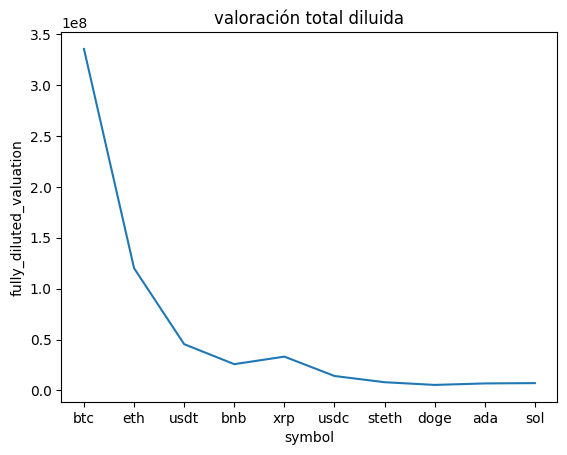

In [37]:
plt.plot(df['symbol'], df['fully_diluted_valuation'])

# Set the title and labels
plt.title('valoración total diluida')
plt.xlabel('symbol')
plt.ylabel('fully_diluted_valuation')

# Show the plot
plt.show()


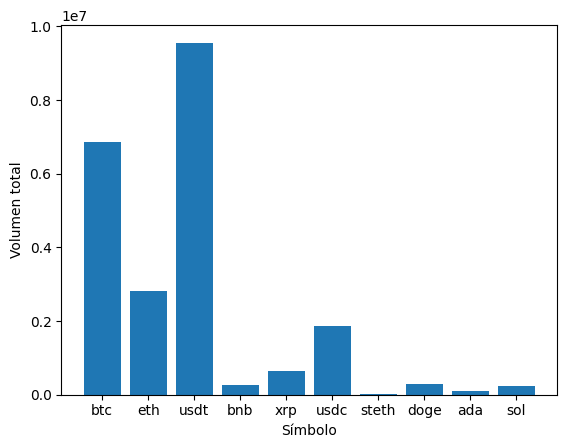

In [41]:
symbol = df['symbol']
volumen = df['total_volume']

plt.bar(symbol, volumen)

plt.xlabel('Símbolo')
plt.ylabel('Volumen total')


# Show the plot
plt.show()


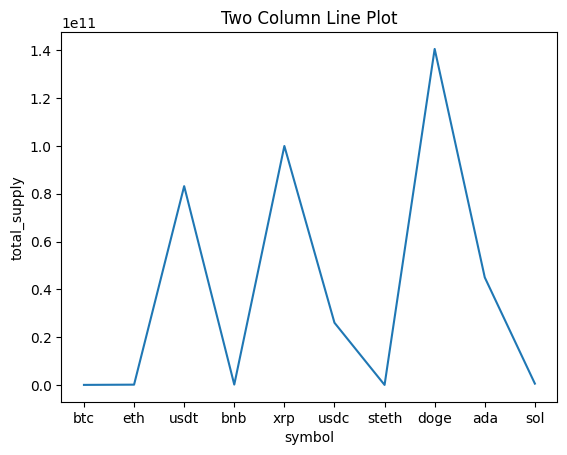

In [39]:
plt.plot(df['symbol'], df['total_supply'])

# Set the title and labels
plt.title('Two Column Line Plot')
plt.xlabel('symbol')
plt.ylabel('total_supply')

# Show the plot
plt.show()

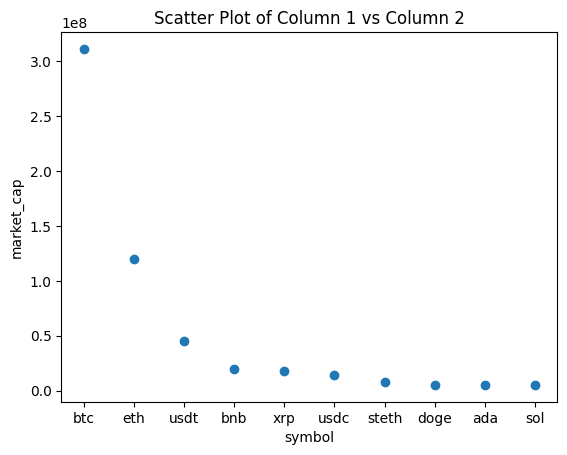

In [40]:
plt.scatter(df['symbol'], df['market_cap'])

# Set the title and labels
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.xlabel('symbol')
plt.ylabel('market_cap')

# Show the plot
plt.show()
